<h1 align="center"> Project Milestone 2: Data Anaysis 1 </h1>
<h1 align="center"> Master Document </h1>
<h3 align="center"> Members: Joshua Jaeger, Maxwell Butler, Austin Funcheon, Conor Joyce, Casey Kemerer, David Poteet </h3>
<h3 align="center"> IST 5520, 2021 Fall </h3>
<h3 align="center"> November 23rd 2021 </h3>
<h3 align="center"> Group 7 </h3>

 <h1 align="center">  Introduction: </h1>
 
 Group 7 intends to use the Lahman Database of MLB statistics to create a fair market calculator for different MLB player's salaries. The database will act as our training set and will be partitioned to include a test set to test the effectiveness of our calculator.

General Managers, or GMs, in the MLB often struggle with determining the true value of a player. These GMs are expected to bring a championship to their team, which involves balancing talent with a budget. There are a significant number of statistics that are utilized to demonstrate the performance of both position players and pitchers, but what statistics truly determine the value of the player. How is a GM able to evaluate a player's performance and provide a salary relatable to their value? The business problems we intend to answer to understand the value of players can be summarized with the following questions:
<ul>
    <li> Given a pitcher's performance what should their salary be? </li>
    <li> Given a batter's performance what should their salary be? </li>
    <li> Given a position player's defensive performance what should their salary be? </li>
</ul>

Depending on project constraints, and what provide the best results, those questions may be modified to better understand the problem at hand.

Our intended input will be relevant season statistics for each group. For example, statistics relevant to a pitcher are ERA, Strike Outs, Win-Loss record, and other stats. However, hitting statistics are not relevant for a pitcher.

Our intended output will either be a specific value for a salary or a salary range which a team could negotiate in.

 <h1 align="center"> Database and collection: </h1>
 
The database we will be using to accomplish our task is the Lahman database, considered the most comprehensive open-source database for baseball statistics. This database meets project requirements: 
<ul>
    <li> the pitching table alone has 23 variables and over 48,000 observations, </li>
    <li> the dataset is raw and uncleansed, we will need to do a lot of cleaning and extraction to get the data we need, </li>
    <li> the data will tell an interesting story by answering our business problem, and </li>
    <li> although the dataset is used by a large number of people (specifically Sabermatricians who use statistics to find truth in baseball) this specific problem has not been addressed and our solution will be unique and independent of any work done with this database.
</ul>

The database is in a relational format with each table in a unique .csv file and has been uploaded to github.
For an explanation of the Baseball terms, and some of the combination variables that were created out of the raw data, see "StatsDictionary.csv" for additional definition and detail.

 <h1 align="center">  Data Consolidation:</h1>
 

First step is to clean, reduce dimensionally, and standardize the data.
In this case, there are two data sets: Pitching, and Hitting.

In file "Data Joining.ipynb", many of the raw files are processed and combined into the pitching and hitting data files, including the following steps:
<br>Importing the data from: 
        <li> People.csv</li>
        <li> Teams.csv </li>
        <li> Pitching.csv </li>
        <li> Batting.csv </li>
        <li> Salaries.csv </li>
Eliminating columns that have no relevance to salary analysis
<br>Export of "joinedPitchingDF.csv" and "joinedHittingDF.csv

<h1 align = 'center'> Libraries to be used: <h1> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cpi
from datetime import date
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


%matplotlib inline

<h1 align="center">  Data Joining File Contents:</h1>

In [2]:
# People database
peopleDF = pd.read_csv(r"../Project/baseballdatabank-master/core/People.csv")

In [3]:
#team database
TeamDF = pd.read_csv(r"../Project/baseballdatabank-master/core/Teams.csv")

In [4]:
##Remove all unneccessary columns
columnsToRemoveTeam = ['franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B',
                       'HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA',
                       'E','DP','FP','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro']

In [5]:
#Pitcher database
pitchingStatsDF = pd.read_csv(r"../Project/baseballdatabank-master/core/Pitching.csv")

In [6]:
#Hitting database
hittingStatsDF = pd.read_csv(r"../Project/baseballdatabank-master/core/Batting.csv")

In [7]:
#Salary Database
SalaryDF = pd.read_csv(r"../Project/baseballdatabank-master/core/Salaries.csv")

Join Pitching Table

In [8]:
##Pitcher joins
joinedPitchingDF = pd.merge(pitchingStatsDF, peopleDF, how = 'left', on = ['playerID'])

In [9]:
joinedPitchingDF = pd.merge(joinedPitchingDF, SalaryDF, how = 'left', on = ['playerID','yearID','teamID','lgID'])

In [10]:
##Remove Unneccessary columns from player table

columnsToDropPlayer = ['birthYear','birthMonth','birthDay','birthCountry','birthState','birthCity','deathYear',
                       'deathMonth','deathDay','deathCountry','deathState','deathCity','weight','height',
                       'debut','finalGame','retroID','bbrefID']

In [11]:
joinedPitchingDF = joinedPitchingDF.drop(columns=columnsToDropPlayer)

In [12]:
joinedPitchingDF = pd.merge(joinedPitchingDF, TeamDF[['yearID','teamID','lgID','name']], 
                            how = 'left', on = ['yearID','teamID','lgID'])

In [13]:
joinedPitchingDF = joinedPitchingDF.rename(columns={'name':'teamName'})

In [14]:
FinalPitchingDF = joinedPitchingDF

Join the Hitting Table

In [15]:
JoinedHittingDF = pd.merge(hittingStatsDF, peopleDF, how = 'left', on = 'playerID')

In [16]:
JoinedHittingDF = JoinedHittingDF.drop(columns = columnsToDropPlayer)

In [17]:
JoinedHittingDF = pd.merge(JoinedHittingDF, SalaryDF, how = 'left', on = ['playerID','yearID','teamID','lgID'])

In [18]:
JoinedHittingDF = pd.merge(JoinedHittingDF,TeamDF[['yearID','teamID','lgID','name']], how = 'left', on = ['yearID','teamID','lgID'] )

In [19]:
JoinedHittingDF = JoinedHittingDF.rename(columns={'name':'teamName'})

In [20]:
FinalHittingDF = JoinedHittingDF

In [21]:
FinalPitchingDF.to_csv(r"../Project/joinedPitchingDF.csv")
FinalHittingDF.to_csv(r"../Project/joinedHittingDF.csv")

<h1 align="center">  End Of Data Joining File Contents</h1>

<h1 align="center">  Start Of Data Cleansing2 Contents:</h1>

<h3 align="center">  Data Cleaning:</h3>

In file "Data Cleansing2.ipynb", several adjustments were made to clean up the data, including the following steps:
<li> Importing the data from "joinedPitchingDF.csv" and "joinedHittingDF.csv" </li>
<li> Cleansing the data of null datasets </li>
<li> Visualize Salary data as a plot by year </li>
<li> Visualize Salary data as an avg plot by year </li>
<li> Creation of the "RealSalary" Field: Adjusting the salary data for inflation, using CPI to normalize the data to 2016 dollars</li>
<li> From the Hitting data set, Pitchers from before 2003 were removed, as irrelevant datapoints. </li>
<li> Creation of "LogSalary" Field, to account for data skew</li>
<li> Removal of data outliers > Q3 + 1.5*IQR on LogSalary </li>
<li> Finalizing and exporting cleansed data as "cleansedPitchingDF.csv" and "cleansedHittingDF.csv" respectively. </li>

<h3> Pitching data cleaning: </h3>

In [22]:
pitchingDF = pd.read_csv(r"../Project/joinedPitchingDF.csv",index_col = 0)

In [23]:
##Remove pitchers with no salary data
pitchingDF = pitchingDF.dropna(subset = ['salary'])

<h3> Hitting Data Cleanse </h3>

In [24]:
hittingDF = pd.read_csv(r"../Project/joinedHittingDF.csv",index_col = 0)

In [25]:
hittingDF = hittingDF.dropna(subset = ['salary'])

<h3> Outlier Analysis: Pitching </h3>

In [26]:
## Add Inflation Values
real_salary_list = []

for i in range(len(pitchingDF)):
    real_salary = cpi.inflate(pitchingDF.iloc[i].salary, pitchingDF.iloc[i].yearID, to=2016)
    real_salary = round(real_salary)
    real_salary_list.append(real_salary)

pitchingDF['RealSalary'] = real_salary_list

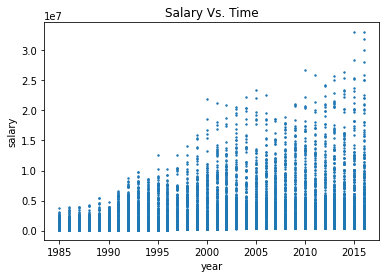

In [27]:
##Visualize how time impacts salary
plt.scatter(pitchingDF.yearID, pitchingDF.RealSalary, s = 2)
plt.title('Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("salary")

plt.show()

In [28]:
yearlyPitchingDF = pitchingDF.groupby(by = 'yearID')

In [29]:
DescriptivePitchingSalaryDF = yearlyPitchingDF.RealSalary.mean().reset_index()

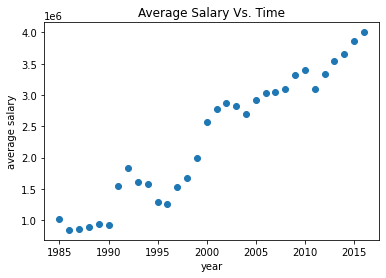

In [30]:
##visualize average salary over the years
plt.scatter(DescriptivePitchingSalaryDF.yearID, DescriptivePitchingSalaryDF.RealSalary)
plt.title('Average Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("average salary")

plt.show()

In [31]:
##Determine when to cutoff salary
cutOffDate = 2003

In [32]:
##remove pitchers from before cut off date
pitchingDF = pitchingDF[pitchingDF.yearID >= cutOffDate]

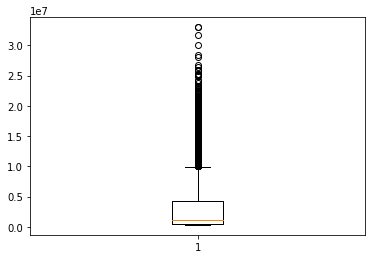

In [33]:
##Boxplot
plt.boxplot(pitchingDF.RealSalary)
plt.show()

In [34]:
##data is highly skewed, introduce Log transform
pitchingDF["LogSalary"] = np.log(pitchingDF.loc[:,"RealSalary"])

C:\Users\Josh\AppData\Local\Temp/ipykernel_32340/2839918436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitchingDF["LogSalary"] = np.log(pitchingDF.loc[:,"RealSalary"])


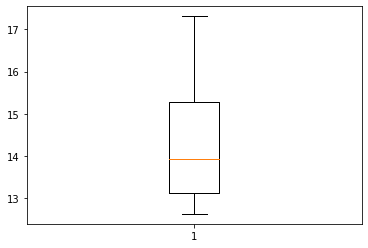

In [35]:
##View Boxplot with log data
plt.boxplot(pitchingDF.LogSalary)
plt.show()

In [36]:
##remove outliers (Baseball has a min salary)
q1p = pitchingDF.LogSalary.quantile(0.25)
q3p = pitchingDF.LogSalary.quantile(0.75)
IQRp = q3p - q1p
maxSal = IQRp*1.5 + q3p

In [37]:
pitchingDF = pitchingDF[pitchingDF.LogSalary <= maxSal]

<h3> Outlier Analysis: Hitting </h3>

In [38]:
##Remove Pitchers from the data set (Historically bad at hitting)
##Need to recreate the original pitching data
pitchersDF = pd.read_csv(r"../Project/joinedPitchingDF.csv",index_col = 0)

booleanPitchers = ~hittingDF.playerID.isin(pitchingDF.playerID)

In [39]:
hittingDF = hittingDF.loc[booleanPitchers == True]

In [40]:
## Add Inflation Values
real_salary_list = []

for i in range(len(hittingDF)):
    real_salary = cpi.inflate(hittingDF.iloc[i].salary, hittingDF.iloc[i].yearID, to=2016)
    real_salary = round(real_salary)
    real_salary_list.append(real_salary)

hittingDF['RealSalary'] = real_salary_list

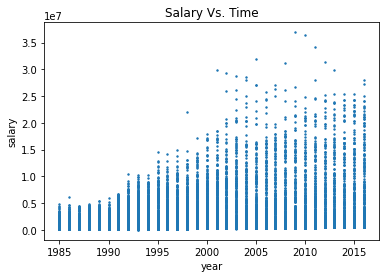

In [41]:
##Visualize Salary as a function of time
plt.scatter(hittingDF.yearID, hittingDF.RealSalary, s = 2)
plt.title('Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("salary")

plt.show()

In [42]:
yearlyHittingDF = hittingDF.groupby(by = 'yearID')

In [43]:
DescriptiveHittingSalaryDF = yearlyHittingDF.RealSalary.mean().reset_index()

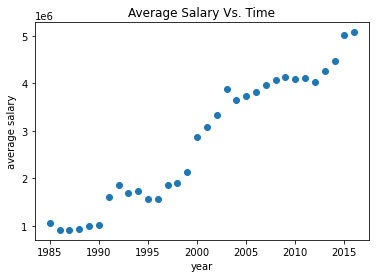

In [44]:
plt.scatter(DescriptiveHittingSalaryDF.yearID, DescriptiveHittingSalaryDF.RealSalary)
plt.title('Average Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("average salary")

plt.show()

In [45]:
##remove pitchers from before cut off date
hittingDF = hittingDF[hittingDF.yearID >= cutOffDate]

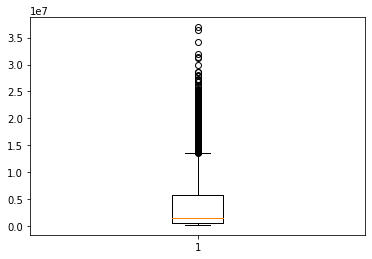

In [46]:
plt.boxplot(hittingDF.RealSalary)
plt.show()

In [47]:
##data is highly skewed, introduce Log transform
hittingDF["LogSalary"] = np.log(hittingDF.loc[:,"RealSalary"])

C:\Users\Josh\AppData\Local\Temp/ipykernel_32340/789934765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hittingDF["LogSalary"] = np.log(hittingDF.loc[:,"RealSalary"])


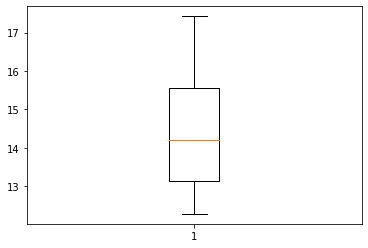

In [48]:
plt.boxplot(hittingDF.LogSalary)
plt.show()

In [49]:
##remove outliers (Baseball has a min salary)
q1h = hittingDF.LogSalary.quantile(0.25)
q3h = hittingDF.LogSalary.quantile(0.75)
IQRh = q3h - q1h
maxSal = IQRh*1.5 + q3h

In [50]:
hittingDF = hittingDF[hittingDF.LogSalary <= maxSal]

In [51]:
finalPitching = pitchingDF
finalHitting = hittingDF

##reset index for formatting
finalPitching = finalPitching.reset_index(drop = True)
finalHitting = finalHitting.reset_index(drop = True)

In [52]:
finalPitching.to_csv(r'../Project/cleansedPitchingDF.csv')

In [53]:
finalHitting.to_csv(r'../Project/cleansedHittingDF.csv')

<h1 align="center">  End Of Data Cleansing2 Contents</h1>

<h1 align="center">  Start Of Dimension Reduction Through Variable Combination Contents:</h1>

 <h3 align="center">  Dimension Reduction Through Variable Combination:</h3>
   
In file "Dimension Reduction - Variable combination.ipynb", cleansed data is imported and variables are aggregated.
  <li>Compliation of XBH, or Extra Base Hits. </li>
  <li>Compliation of SLG, or Slugging  </li>
  <li>Compliation of BA, or Batting Average  </li>
  <li>Compliation of OBP, or On Base Percentage  </li>
  <li>Compliation of OPS, or On Base Plus Slugging  </li>
  <li>Dropping of irrelevant / combined varibles feeding the above common baseball summary statistics </li>
Export of "combinationPitchingDF.csv" and "combinationHittingDF.csv"

In [54]:
##read in csvs
pitchingDF = pd.read_csv(r"../Project/cleansedPitchingDF.csv",index_col = 0)
hittingDF = pd.read_csv(r"../Project/cleansedHittingDF.csv", index_col = 0)

<h3> Hitting Values </h3>

In [55]:
## XBH - Extra Base Hits
hittingDF["XBH"] = hittingDF["2B"]+hittingDF["3B"]+hittingDF.HR
## SLG - Slugging (singles = hits - extra base hits)
hittingDF["SLG"] = ((hittingDF.H-hittingDF.XBH)+2*hittingDF["2B"]+3*hittingDF["3B"]+4*hittingDF.HR)/hittingDF.AB

In [56]:
##Batting Average
hittingDF["BA"] = hittingDF.H/hittingDF.AB

In [57]:
## OBP - On Base percentage
hittingDF["OBP"] = (hittingDF.H + hittingDF.BB + hittingDF.HBP)/(hittingDF.AB + hittingDF.BB + hittingDF.HBP + hittingDF.SF)

In [58]:
## OPS - On-Base Plus Slugging
hittingDF["OPS"] = (hittingDF.OBP + hittingDF.SLG)

In [59]:
## Clean up variables that are now accounted for and others that are no longer needed (Our analysis will only be using Log Salary)
hittingDF = hittingDF.drop(columns = ["stint","lgID","teamID","AB","H","2B","3B","HR","BB","HBP","throws","salary","RealSalary"])

<h3> Pitching Values </h3>

In [60]:
##Clean Up Variables
pitchingDF = pitchingDF.drop(columns = ["stint","lgID","teamID","bats","salary","RealSalary"])

<h3> Export Data </h3>

In [61]:
pitchingDF.to_csv(r"../Project/combinationPitchingDF.csv")
hittingDF.to_csv(r"../Project/combinationHittingDF.csv")

<h1 align="center">  End Of Dimension Reduction Through Variable Combination Contents</h1>

<h1 align="center"> Start Of Dealing with NA Values Detected Later:</h1>

In [62]:
pitchingdat = pd.read_csv(r"../Project/combinationPitchingDF.csv", index_col = 0)
hittingdat = pd.read_csv(r"../Project/combinationHittingDF.csv", index_col = 0)

In [63]:
pitchingnoNA = pitchingdat.dropna()

In [64]:
hittingnoNA = hittingdat.dropna()

In [65]:
pitchingnoNA.to_csv("../Project/no_NA_PitchingDF.csv")

In [66]:
hittingnoNA.to_csv("../Project/no_NA_HittingDF.csv")

<h1 align="center"> End Of Dealing with NA Values Detected Later:</h1>

<h1 align="center">  Start Of Correlation Analysis Contents:</h1>

 <h3 align="center">  Correlation Analysis:</h3>

This step is to run several steps of correlation analysis, and reduce the dimensionality of the dataset.

In file "Correlation .ipynb", an initial review of the correlation of variables was conducted. 
<li> Importing the data </li>
<li> Visualizing a heat map of the remaining variables</li>

In [67]:
pitchingdat = pd.read_csv(r"../Project/no_NA_PitchingDF.csv", index_col = 0)
hittingdat = pd.read_csv(r"../Project/no_NA_HittingDF.csv", index_col = 0)

<h3> Correlation Analysis on Pitching DataFrame</h3>

In [68]:
pitchingcorr = pitchingdat.corr(method = 'pearson')

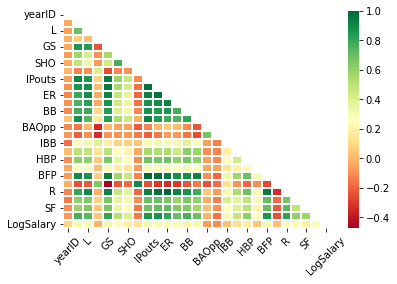

In [69]:
# Corralation Heatmap for Pitching
mask = np.zeros_like(pitchingdat.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(pitchingdat.corr(), cmap = 'RdYlGn', vmax = 1.0, mask = mask, linewidths = 2)

plt.yticks(rotation=0)
plt.xticks(rotation=45);

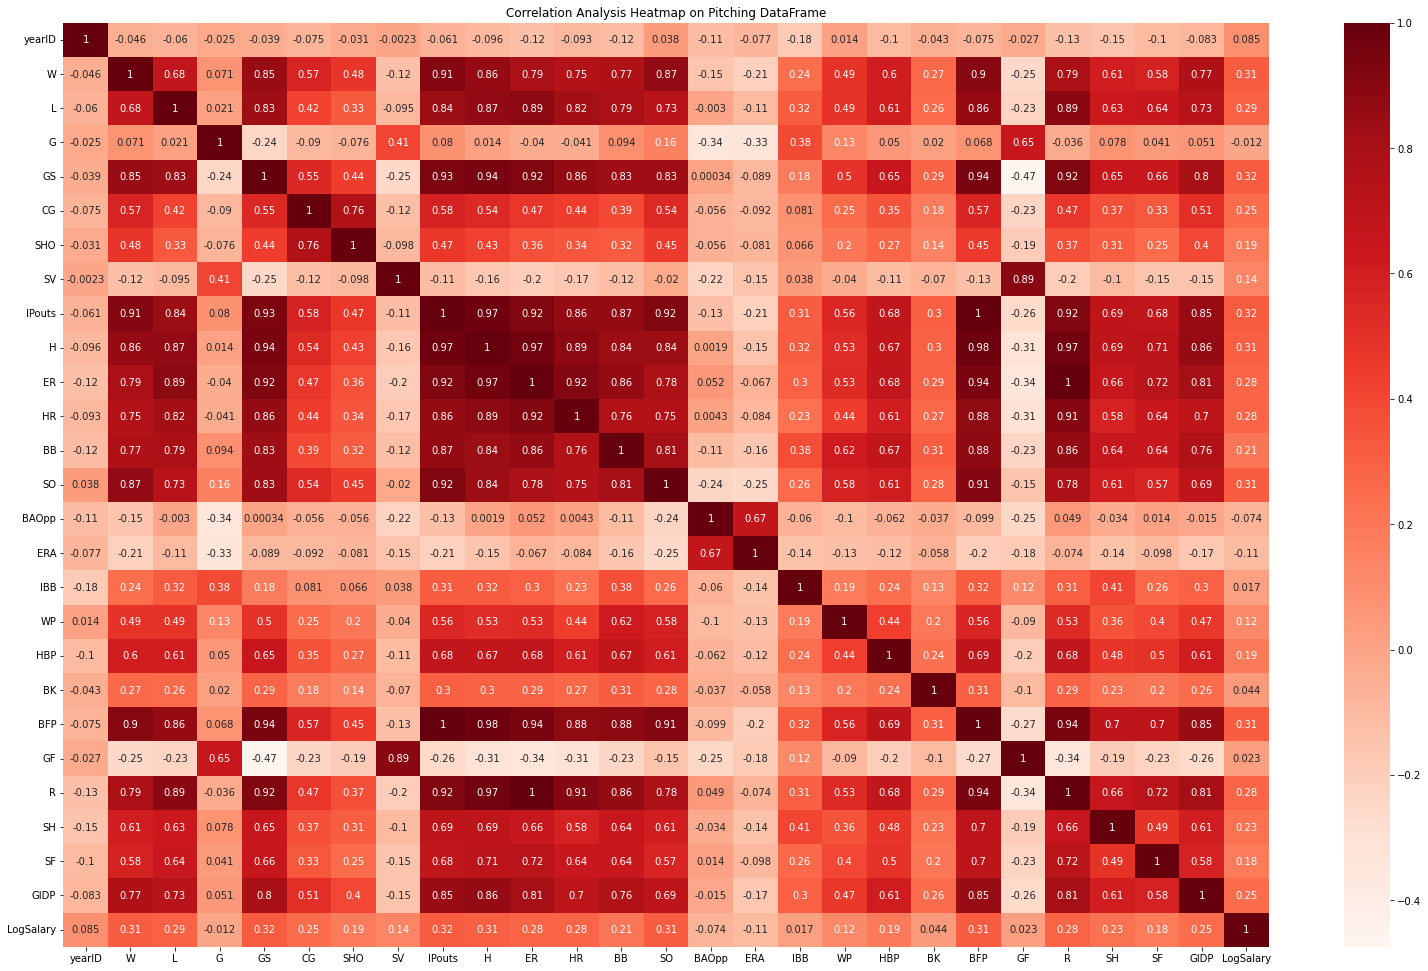

In [70]:
plt.figure(figsize = (27,17))
corrpitching = pitchingdat.corr()
sns.heatmap(corrpitching, annot = True, cmap = plt.cm.Reds)
plt.title("Correlation Analysis Heatmap on Pitching DataFrame")
plt.savefig('PitchingHeatmap')
plt.show()

<h3> Correlation Analysis on Pitching DataFrame</h3>

In [71]:
hittingcorr = hittingdat.corr(method = 'pearson')

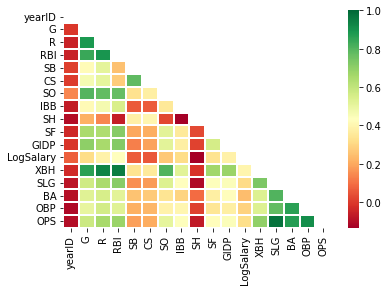

In [72]:
# Corralation Heatmap for Hitting
mask2 = np.zeros_like(hittingdat.corr())
mask2[np.triu_indices_from(mask2)] = True

sns.heatmap(hittingdat.corr(), cmap = 'RdYlGn', vmax = 1.0, mask = mask2, linewidths = 2);

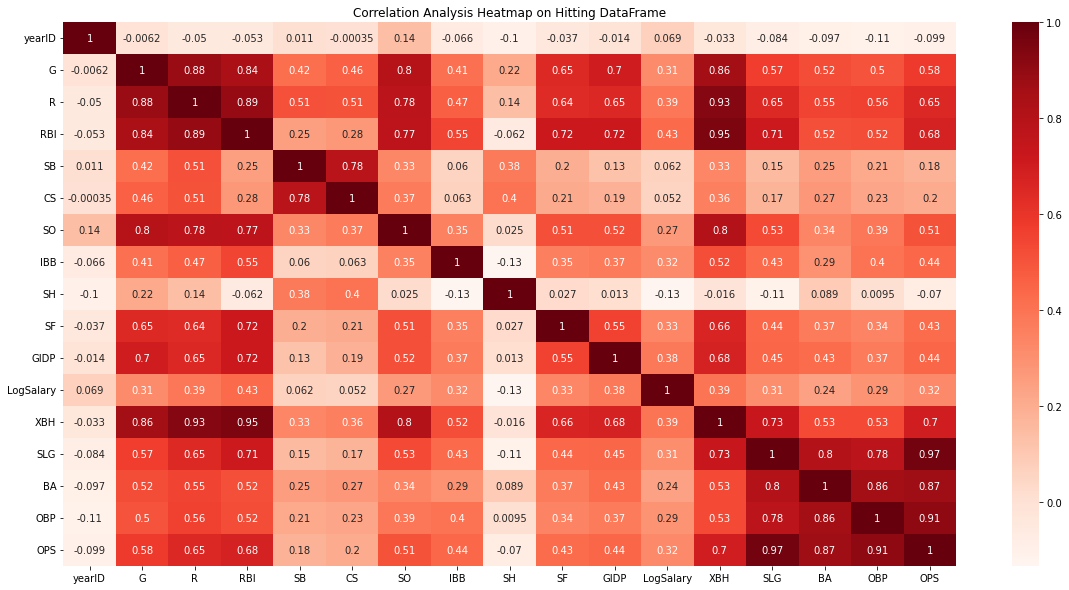

In [73]:
plt.figure(figsize = (20,10))
corrpitching = hittingdat.corr()
sns.heatmap(corrpitching, annot = True, cmap = plt.cm.Reds)
plt.title("Correlation Analysis Heatmap on Hitting DataFrame")
plt.savefig('HittingHeatmap')
plt.show()

<h3> Variable Analysis for Pitching Dataset </h3>

IPOuts – Innings Pitched * Outs and BFP – Batter’s Facing Pitcher. 

    These both have major multicollinearity issues and are measuring the same thing.
    Dropping BFP

R – Runs, ER- Earned Runs. 

    This has high multicollinearity, little difference between the R, ER, and ERA.
    Keeping ERA
    Dropping R, ER

BB – Intentional Base on Balls. 

    More of a coaching decision than player performance. Low correlation to LogSalary.
    Dropping BB

BK – Balks.
    
    Low correlation with LogSalary and some multicollinearity issues.
    Dropping BK

GF – Games Finished. 

    Low correlation with LogSalary and some multicollinearity issues
    Dropping GF

G- Games, 

    Low correlation with LogSalary and multicollinearity issues.
    Dropping G

L- Losses, 

    L has a lot of correlation with W – Wins, 
    Combining into W/L Ratio.
     Dropping both W and L.

<h3> Variable Analysis for Hitting Dataset </h3>
All of the below variables are measuring similar effects and have a large amount of collinearity with eachother. Using variable OPS – On-Base Plus Slugging is a good substitue for all of the variables, and takes all of these into account, so there is very little loss of fidelity.  

+OPS variable added. Removals: 

    ·XBH – Extra Base hits, 
    ·SLG – Slugging, 
    ·BA – Batting Average, 
    ·OBP – On-Base Percentage 
    
Additonally, 

    ·CS – Caught Stealing, removing due to high colinearity with SB – Stolen Bases. 
    
        Someone who steals more bases is likely to get caught more as well, so this make sense.
        Dropping CS.

    ·G – Games played Has multicollinearity with several variables being kept. 
    
        It is also not a reflection of a player’s ability to play.
        Dropping G

<h1 align="center">  End Of Correlation Analysis Contents</h1>

<h1 align="center">  Start Of Removing Values with Multicollinearity:</h1>

In [74]:
pitchingdat = pd.read_csv(r"../Project/no_NA_PitchingDF.csv", index_col = 0)
hittingdat = pd.read_csv(r"../Project/no_NA_HittingDF.csv", index_col = 0)

<h3> Variable Removal From Hitting DataFrame</h3>

In [75]:
hittingdat = hittingdat.drop(columns = ["XBH", "SLG", "OBP" , "CS", "G"])

<h3 align="center"> Variable Removal From Pitching DataFrame</h3>

In [76]:
pitchingdat = pitchingdat.drop(columns = ["IPouts", "BFP", "R", "ER", "IBB", "BK", "GF", "G"])

<h3> Combining Wins and Loses with a W/L ratio</h3>
<h3> By Combining Winds and Loses we can protect and preserve data fidelity </h3>

<h3> Getting a Ratio of Wins and Losses and then deleting both the W and L columns </h3>
<h3>Because there are some zero values that would result in inf values, I converted those numbers to 0, meaning they have no W/L ratio at this time </h3>

In [77]:
pitchingdat["Win/Loss"] = pitchingdat.W.div(pitchingdat.L)

pitchingdat.loc[~np.isfinite(pitchingdat['Win/Loss']), 'Win/Loss'] = 0

In [78]:
pitchingdat = pitchingdat.drop(columns = ["L", "W"])

<h3> Saving the new csv files with removed values for later use </h3>

In [79]:
pitchingdat.to_csv(r"../Project/Multicollinearity_Removal_Pitching.csv")
hittingdat.to_csv(r"../Project/Multicollinearity_Removal_Hitting.csv")

<h1 align="center">  End Of Removing Values with Multicollinearity:</h1>

<h1 align="center">  Start Of Correlation Analysis with Variable Removal Contents:</h1>

In file "Correlation Analysis after Variable Removal.ipynb", an initial review of the correlation of variables was conducted. 
<li> Importing the data </li>
<li> Visualizing a heat map of the remaining variables</li>

In [80]:
pitchingdat_multi = pd.read_csv(r"../Project/Multicollinearity_Removal_Pitching.csv", index_col = 0)
hittingdat_multi = pd.read_csv(r"../Project/Multicollinearity_Removal_Hitting.csv", index_col = 0)

<h3> Correlation Analysis on Pitching DataFrame</h3>

In [81]:
pitchingcorr_multi = pitchingdat_multi.corr(method = 'pearson')

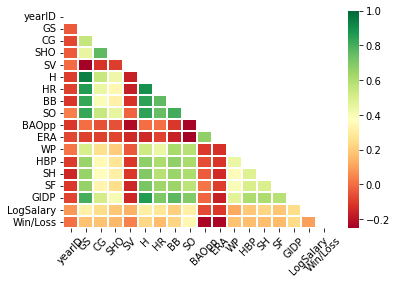

In [82]:
# Corralation Heatmap for Pitching
mask = np.zeros_like(pitchingdat_multi.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(pitchingdat_multi.corr(), cmap = 'RdYlGn', vmax = 1.0, mask = mask, linewidths = 2)

plt.yticks(rotation=0)
plt.xticks(rotation=45);

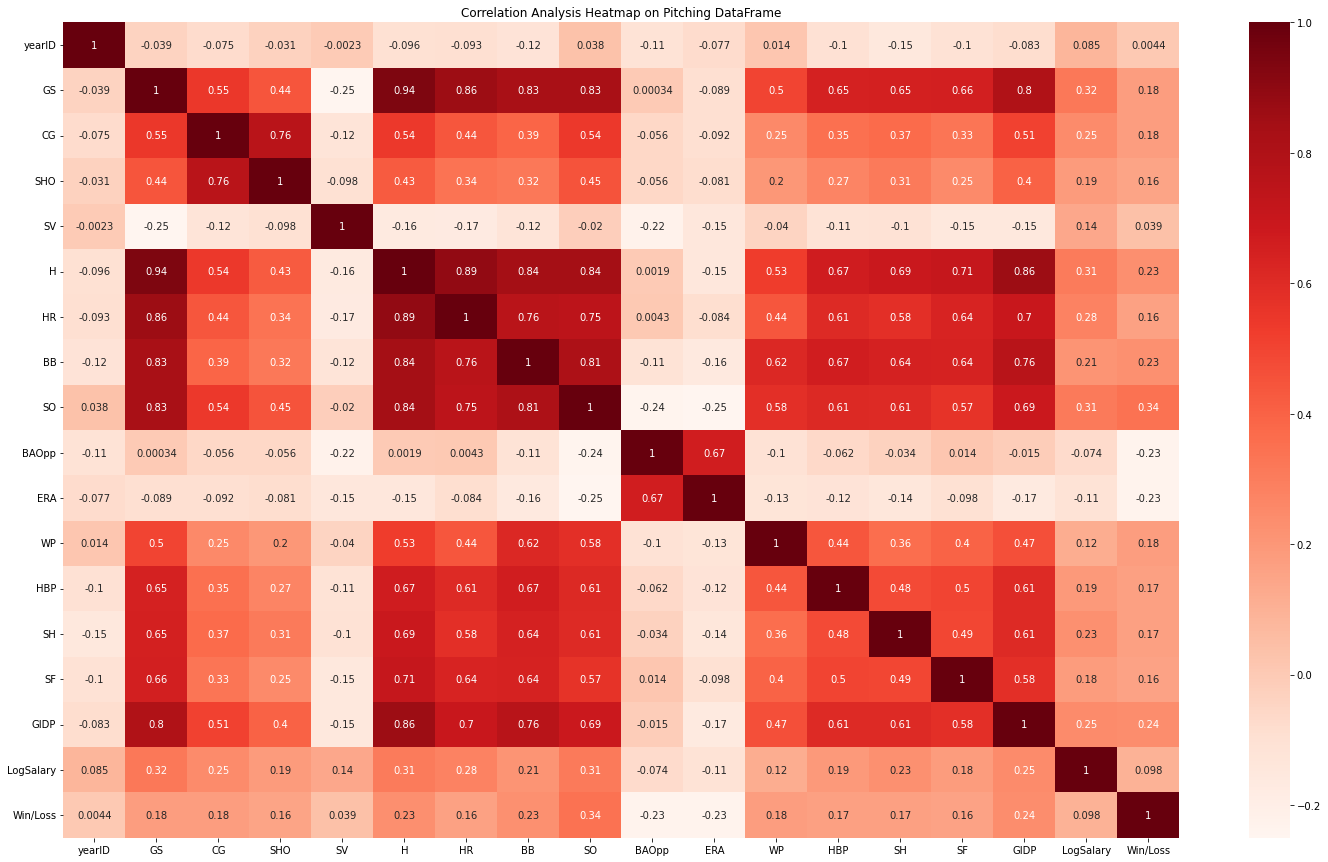

In [83]:
plt.figure(figsize = (25,15))
corrpitching = pitchingdat_multi.corr()
sns.heatmap(corrpitching, annot = True, cmap = plt.cm.Reds)
plt.title("Correlation Analysis Heatmap on Pitching DataFrame")
plt.savefig('PitchingHeatmap2')
plt.show()

<h3> Correlation Analysis on Hitting DataFrame</h3>

In [84]:
hittingcorr_multi = hittingdat_multi.corr(method = 'pearson')

<AxesSubplot:>

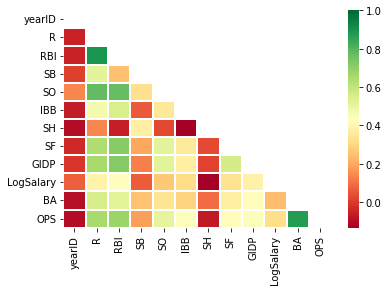

In [85]:
# Corralation Heatmap for Hitting
mask2 = np.zeros_like(hittingdat_multi.corr())
mask2[np.triu_indices_from(mask2)] = True

sns.heatmap(hittingdat_multi.corr(), cmap = 'RdYlGn', vmax = 1.0, mask = mask2, linewidths = 2)

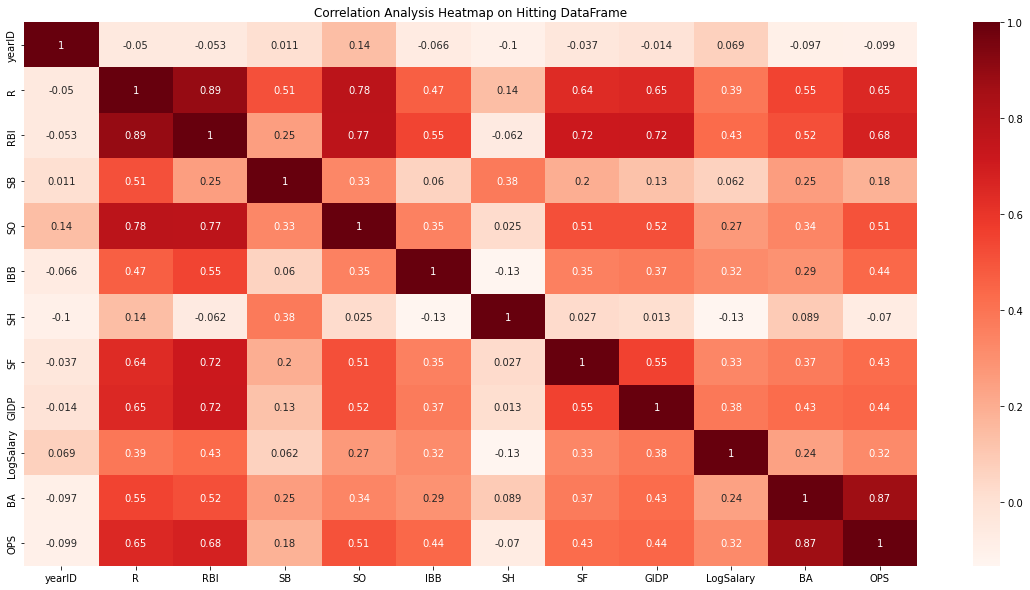

In [86]:
plt.figure(figsize = (20,10))
corrpitching = hittingdat_multi.corr()
sns.heatmap(corrpitching, annot = True, cmap = plt.cm.Reds)
plt.title("Correlation Analysis Heatmap on Hitting DataFrame")
plt.savefig('HittingHeatmap2')
plt.show()

<h1 align="center">  End Of Correlation Analysis with Variable Removal Contents</h1>

<h1 align="center">  Start Of Principal Component Analysis Contents:</h1>

This step is to run and initial PCA, and then repeat the process once reduction is achieved.

In file "PCA.ipynb", an initial review of the principal component analysis.
        Steps included:
        <li>Importing the data from "no_NA_PitchingDF.csv" and "no_NA_HittingDF.csv" </li>
        <li> Normalizing the data</li>
        <li> Setting the PCA up for each dataset </li>
        <li> Running Scree Plots and identifying 90% Integrity levels</li>
        <li> Outputing the initial PCA matrix </li>
       


In [87]:
pitchingdat = pd.read_csv(r"../Project/no_NA_PitchingDF.csv", index_col = 0)
hittingdat = pd.read_csv(r"../Project/no_NA_HittingDF.csv", index_col = 0)

<h3> Normailze data before doing PCA </h3>

In [88]:
#Changing Column order to make it easier to use loc to normalize the dataframe

pitchingdat = pitchingdat.reindex(['playerID', 'yearID', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 
                                   'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP', 
                                   'LogSalary', 'nameFirst', 'nameLast', 'nameGiven', 'throws', 'teamName'], axis = 1)

hittingdat = hittingdat.reindex(['playerID', 'yearID', 'G', 'R', 'RBI', 'SB', 'CS', 'SO', 'IBB', 'SH', 'SF', 'GIDP', 'XBH',
                                 'SLG', 'BA', 'OBP', 'OPS', 'LogSalary', 'nameFirst', 'nameLast', 'nameGiven', 'bats',
                                 'teamName'], axis = 1)

In [89]:
pitchingnorm = scale(pitchingdat.loc[:,'yearID':'LogSalary'])
hittingnorm = scale(hittingdat.loc[:,'yearID':'LogSalary'])

<h3> Principal Component Analysis for Pitching </h3>

In [90]:
# Selecting Number of Components and fitting the PCA model for Pitching

pitchingPCA = PCA(n_components = 27)
pitchingPCA.fit(pitchingnorm)

PCA(n_components=27)

In [91]:
#The amount of variance that each PC explains

pitchingvar = pitchingPCA.explained_variance_ratio_

print(pitchingvar)

[4.91874483e-01 1.06735723e-01 5.96048959e-02 4.75405965e-02
 4.32897675e-02 3.37437230e-02 3.10957871e-02 2.96256531e-02
 2.29764692e-02 1.88619647e-02 1.83385435e-02 1.63586333e-02
 1.48819077e-02 1.39418396e-02 1.21457219e-02 9.49995117e-03
 8.54474332e-03 6.30689154e-03 5.16070851e-03 3.46344645e-03
 2.73594343e-03 1.54674748e-03 1.06681692e-03 3.62252011e-04
 1.81630137e-04 1.12680135e-04 2.48035381e-06]


In [92]:
#Cumulative Variance Explains for Pitching

pitchingvar1 = np.cumsum(np.round(pitchingPCA.explained_variance_ratio_, decimals = 4)*100)

print(pitchingvar1)

[49.19 59.86 65.82 70.57 74.9  78.27 81.38 84.34 86.64 88.53 90.36 92.
 93.49 94.88 96.09 97.04 97.89 98.52 99.04 99.39 99.66 99.81 99.92 99.96
 99.98 99.99 99.99]


Drawing a Scree Plot for both Pitching and Hitting to show the cumulative variance explained along the number of principal components

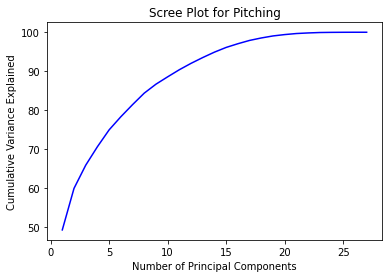

In [93]:
pitchingvar1 = pd.DataFrame(pitchingvar1, index=np.arange(1,28))
plt.plot(pitchingvar1,color='blue')
plt.title('Scree Plot for Pitching')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see if we choose a 11-component solution, the explained variance would be > 90%. 

In [94]:
pitchingPCA11 = PCA(n_components = 11)
pitchingPCA11.fit(pitchingnorm)
data_pitchingPCA11 = pitchingPCA11.transform(pitchingnorm)

pd.DataFrame(pitchingPCA11.components_.transpose(),
            index = pitchingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,12)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yearID,-0.025583,-0.013020,-0.336952,-0.233649,-0.497149,0.251681,0.429230,0.479276,-0.248043,-0.038277,0.067679
W,0.243157,-0.043516,-0.125251,0.016130,0.019409,-0.002033,0.037910,-0.032580,-0.013356,-0.066233,0.027010
L,0.240815,-0.005135,0.106021,0.013764,-0.125143,-0.032996,-0.025765,0.028892,-0.113980,-0.025932,-0.064342
G,0.004591,-0.474743,0.170559,-0.020965,0.120866,0.044103,0.226259,0.130221,-0.007715,0.314885,0.179775
GS,0.260310,0.115893,-0.063932,-0.012797,-0.093931,-0.026464,-0.063999,-0.049949,-0.060346,-0.137556,-0.072207
CG,0.160666,0.048277,-0.371138,0.355248,0.318175,0.053660,0.125033,0.011720,-0.002710,0.095111,0.021124
SHO,0.131554,0.041371,-0.400501,0.371722,0.366621,0.088891,0.208026,0.053607,-0.009982,0.077924,-0.002487
SV,-0.049450,-0.432696,0.057813,0.397553,-0.245006,0.107002,-0.063469,-0.186766,-0.172834,-0.215675,-0.108697
IPouts,0.269531,-0.046035,-0.039626,0.006884,-0.018766,-0.006039,0.021396,-0.017705,-0.061248,-0.038351,-0.014399
H,0.268762,0.012968,0.038787,0.024017,-0.041914,-0.037520,-0.008044,0.002396,-0.104569,0.008679,-0.027277


<h3> Principal Component Analysis for Hitting </h3>

In [95]:
# Selecting Number of Components and fitting the PCA model for Hitting

hittingPCA = PCA(n_components = 17)
hittingPCA.fit(hittingnorm)

PCA(n_components=17)

In [96]:
#The amount of variance that each PC explains

hittingvar = hittingPCA.explained_variance_ratio_

print(hittingvar)

[4.84631380e-01 1.25427779e-01 9.64933833e-02 6.13064128e-02
 4.70088379e-02 4.35962769e-02 3.62445543e-02 2.76148550e-02
 2.57444829e-02 1.37974622e-02 1.26826169e-02 8.55576270e-03
 7.16534048e-03 4.94380383e-03 2.99292452e-03 1.79412747e-03
 1.95828617e-32]


In [97]:
#Cumulative Variance Explains for Hitting

hittingvar1 = np.cumsum(np.round(hittingPCA.explained_variance_ratio_, decimals = 4)*100)

print(hittingvar1)

[48.46 61.   70.65 76.78 81.48 85.84 89.46 92.22 94.79 96.17 97.44 98.3
 99.02 99.51 99.81 99.99 99.99]


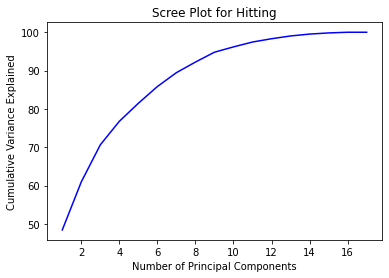

In [98]:
hittingvar1 = pd.DataFrame(hittingvar1, index=np.arange(1,18))
plt.plot(hittingvar1,color='blue')
plt.title('Scree Plot for Hitting')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see that if we choose a 8-component solution, the explained variance would be > 90%.

In [99]:
hittingPCA8 = PCA(n_components = 8)
hittingPCA8.fit(hittingnorm)
data_hittingPCA8 = hittingPCA8.transform(hittingnorm)

pd.DataFrame(hittingPCA8.components_.transpose(),
            index = hittingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,9)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
yearID,-0.017810,0.036497,-0.253805,0.867017,-0.108011,-0.190238,0.296642,0.148002
G,0.307946,0.160843,-0.140689,-0.063136,-0.148560,-0.101990,0.060193,-0.125382
R,0.323707,0.141478,-0.094940,-0.039941,-0.007689,0.077188,-0.051962,-0.088893
RBI,0.321305,-0.048061,-0.206368,-0.094181,-0.085929,0.051542,-0.050503,-0.030654
SB,0.139469,0.509306,0.152532,0.139915,0.230789,0.269834,-0.149177,0.176236
CS,0.149334,0.511538,0.147658,0.115449,0.171740,0.215392,-0.128059,0.095387
SO,0.269252,0.110838,-0.233024,0.139514,-0.281333,0.144672,-0.060773,-0.372852
IBB,0.191876,-0.184060,-0.123805,-0.137318,0.295664,0.469087,0.737067,0.116036
SH,0.019694,0.464547,0.210719,-0.216993,0.004085,-0.514133,0.500432,-0.190056
SF,0.240224,0.007011,-0.238656,-0.186013,-0.068233,-0.218217,-0.094054,0.798986


<h1 align="center">  End Of Principal Component Analysis Contents</h1>

<h1 align="center">  Start Of Principal Component Analysis with Variable Removal Contents:</h1>

This step is to run with a repeated PCA, once variables have been removed from above correlation studies

In file "PCA after Variable Removal.ipynb", an initial review of the principal component analysis.
        Steps included:
        <li>Importing the data from "Multicollinearity_Removal_Pitching.csv" and "Multicollinearity_Removal_Hitting.csv" </li>
        <li> Normalizing the data</li>
        <li> Setting the PCA up for each dataset </li>
        <li> Running Scree Plots and identifying 90% Integrity levels</li>
        <li> Outputing the new PCA matrix </li>

In [100]:
pitchingdat = pd.read_csv(r"../Project/Multicollinearity_Removal_Pitching.csv", index_col = 0)
hittingdat = pd.read_csv(r"../Project/Multicollinearity_Removal_Hitting.csv", index_col = 0)

<h3> Normailze data before doing PCA </h3>

In [101]:
#Changing Column order to make it easier to use loc to normalize the dataframe

pitchingdat = pitchingdat.reindex(['playerID', 'yearID', 'GS', 'CG', 'SHO', 'SV', 'H', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 
                                   'WP', 'HBP', 'SH', 'SF', 'GIDP', 'Win/Loss', 'LogSalary', 'nameFirst', 'nameLast', 
                                   'nameGiven', 'throws', 'teamName'], axis = 1)

hittingdat = hittingdat.reindex(['playerID', 'yearID', 'R', 'RBI', 'SB', 'SO', 'IBB', 'SH', 'SF', 'GIDP', 'BA', 'OPS', 
                                 'LogSalary', 'nameFirst', 'nameLast', 'nameGiven', 'bats', 'teamName'], axis = 1)

In [102]:
pitchingnorm_multi = scale(pitchingdat.loc[:,'yearID':'LogSalary'])
hittingnorm_multi = scale(hittingdat.loc[:,'yearID':'LogSalary'])

In [103]:
pitching_corr = pd.DataFrame(pitchingnorm_multi).describe().transpose()
pitching_corr

,count,mean,std,min,25%,50%,75%,max
0,5503.0,9.668443e-15,1.000091,-1.640313,-0.896297,0.095723,0.839738,1.583753
1,5503.0,-2.582383e-18,1.000091,-0.764392,-0.764392,-0.764392,0.941984,2.027859
2,5503.0,3.873575e-17,1.000091,-0.357607,-0.357607,-0.357607,-0.357607,11.803639
3,5503.0,-2.840622e-17,1.000091,-0.293937,-0.293937,-0.293937,-0.293937,12.982693
4,5503.0,2.195026e-17,1.000091,-0.335457,-0.335457,-0.335457,-0.219348,6.863307
5,5503.0,-1.032953e-17,1.000091,-1.277552,-0.747497,-0.384030,0.782093,2.781160
6,5503.0,7.230673e-17,1.000091,-1.167523,-0.800492,-0.311117,0.667632,4.460286
7,5503.0,6.197720e-17,1.000091,-1.375342,-0.765693,-0.249837,0.594292,4.205287
8,5503.0,-8.263626e-17,1.000091,-1.244577,-0.750731,-0.256886,0.511319,4.260888
9,5503.0,-3.925222e-16,1.000091,-4.351648,-0.476195,-0.062151,0.401578,8.897763


In [104]:
hitting_corr = pd.DataFrame(hittingnorm_multi).describe().transpose()
hitting_corr

,count,mean,std,min,25%,50%,75%,max
0,5373.0,1.337243e-14,1.000093,-1.571616,-0.831754,-0.091892,0.894591,1.634453
1,5373.0,1.110843e-16,1.000093,-1.468272,-0.885174,-0.107710,0.766937,3.164118
2,5373.0,-7.934592e-17,1.000093,-1.391244,-0.848488,-0.146098,0.683999,3.589340
3,5373.0,-5.554215e-17,1.000093,-0.643605,-0.643605,-0.424316,0.123909,7.908701
4,5373.0,8.463565e-17,1.000093,-1.616305,-0.817169,-0.117926,0.706183,3.952672
5,5373.0,0.000000e+00,1.000093,-0.612681,-0.612681,-0.376633,0.095465,27.713184
6,5373.0,3.173837e-17,1.000093,-0.635943,-0.635943,-0.264256,0.107432,8.284550
7,5373.0,-3.438323e-17,1.000093,-1.133355,-0.720086,-0.306817,0.519720,5.065676
8,5373.0,-3.702810e-17,1.000093,-1.331118,-0.820229,-0.139045,0.542139,4.118357
9,5373.0,-2.115891e-17,1.000093,-4.709223,-0.400737,0.126940,0.586664,14.073085


<h3> Principal Component Analysis for Pitching </h3>

In [105]:
# Selecting Number of Components and fitting the PCA model for Pitching

pitchingPCA = PCA(n_components = 18)
pitchingPCA.fit(pitchingnorm_multi)

PCA(n_components=18)

In [106]:
#The amount of variance that each PC explains

pitchingvar = pitchingPCA.explained_variance_ratio_

print(pitchingvar)

[0.43153099 0.10872301 0.07267512 0.05862232 0.05685596 0.04646408
 0.0428496  0.03219407 0.028242   0.02769304 0.02230389 0.02071778
 0.0149272  0.01290433 0.00999551 0.00699367 0.00457728 0.00173015]


In [107]:
#Cumulative Variance Explains for Pitching

pitchingvar1 = np.cumsum(np.round(pitchingPCA.explained_variance_ratio_, decimals = 4)*100)

print(pitchingvar1)

[43.15 54.02 61.29 67.15 72.84 77.49 81.77 84.99 87.81 90.58 92.81 94.88
 96.37 97.66 98.66 99.36 99.82 99.99]


Drawing a Scree Plot for both Pitching and Hitting to show the cumulative variance explained along the number of principal components

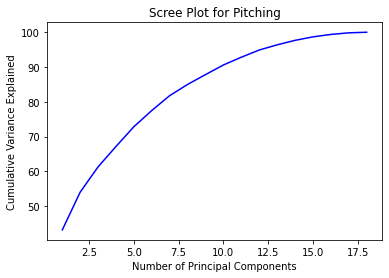

In [108]:
pitchingvar1 = pd.DataFrame(pitchingvar1, index=np.arange(1,19))
plt.plot(pitchingvar1,color='blue')
plt.title('Scree Plot for Pitching')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

In [109]:
pitchingPCA11 = PCA(n_components = 10)
pitchingPCA11.fit(pitchingnorm_multi)
data_pitchingPCA11 = pitchingPCA11.transform(pitchingnorm_multi)

pd.DataFrame(pitchingPCA11.components_.transpose(),
            index = pitchingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,11)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
yearID,-0.032059,-0.179879,0.070432,0.683152,-0.582365,0.060158,0.103310,-0.319918,0.035531,0.060734
GS,0.335430,0.098082,-0.007945,0.087079,-0.057510,-0.065262,-0.072484,-0.046474,-0.011485,0.020103
CG,0.222165,-0.001882,0.592801,-0.123691,-0.005756,-0.044305,0.133334,0.014078,-0.065751,-0.037857
SHO,0.185842,-0.016216,0.653585,-0.139715,-0.046748,-0.042919,0.210557,-0.024839,-0.002970,-0.040900
SV,-0.057823,-0.338162,-0.043675,0.189639,0.650100,0.138027,0.447518,-0.416374,-0.060557,-0.008648
H,0.345448,0.068543,-0.050188,0.037759,0.022958,-0.018900,-0.060445,-0.114911,-0.010595,-0.027830
HR,0.310222,0.096697,-0.092428,0.075071,0.028704,-0.062107,-0.098726,-0.119432,-0.126946,-0.030937
BB,0.319700,0.009240,-0.208482,-0.024521,-0.002740,0.000613,0.109144,0.034196,0.054558,0.033345
SO,0.320603,-0.133180,-0.003232,0.076065,-0.032807,0.081684,0.115486,-0.035695,0.040921,0.032766
BAOpp,-0.036494,0.612714,0.049245,0.156817,0.103185,0.252665,0.012898,-0.081977,0.054253,-0.041101


<h3> Principal Component Analysis for Hitting </h3>

In [110]:
# Selecting Number of Components and fitting the PCA model for Hitting

hittingPCA = PCA(n_components = 12)
hittingPCA.fit(hittingnorm_multi)

PCA(n_components=12)

In [111]:
#The amount of variance that each PC explains

hittingvar = hittingPCA.explained_variance_ratio_

print(hittingvar)

[0.43823134 0.1255481  0.09769304 0.07633407 0.06210274 0.05732521
 0.04912046 0.0375884  0.03351924 0.01180716 0.00624365 0.00448659]


In [112]:
#Cumulative Variance Explains for Hitting

hittingvar1 = np.cumsum(np.round(hittingPCA.explained_variance_ratio_, decimals = 4)*100)

print(hittingvar1)

[43.82 56.37 66.14 73.77 79.98 85.71 90.62 94.38 97.73 98.91 99.53 99.98]


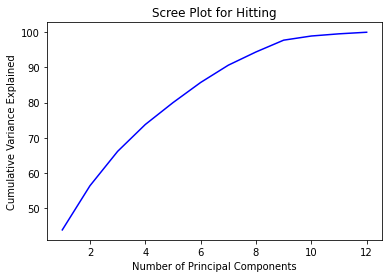

In [113]:
hittingvar1 = pd.DataFrame(hittingvar1, index=np.arange(1,13))
plt.plot(hittingvar1,color='blue')
plt.title('Scree Plot for Hitting')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see that if we choose a 7-component solution, the explained variance would be > 90%.

In [114]:
hittingPCA8 = PCA(n_components = 7)
hittingPCA8.fit(hittingnorm_multi)
data_hittingPCA8 = hittingPCA8.transform(hittingnorm_multi)

pd.DataFrame(hittingPCA8.components_.transpose(),
            index = hittingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,8)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
yearID,-0.017919,-0.117548,-0.718768,0.568385,-0.001604,-0.062439,0.322427
R,0.404014,0.155902,-0.090016,-0.068651,-0.063118,0.087214,-0.120324
RBI,0.409430,-0.080819,-0.059863,-0.139808,-0.153176,-0.023753,-0.053202
SB,0.163396,0.582754,-0.177994,0.094927,0.136725,0.420821,-0.371017
SO,0.337051,0.058819,-0.308313,-0.010017,-0.335465,0.063943,-0.154527
IBB,0.254480,-0.253148,0.102854,-0.161078,0.007358,0.689177,0.568414
SH,0.012745,0.672243,0.008402,-0.142396,0.252838,-0.190056,0.560317
SF,0.319089,-0.028341,-0.103126,-0.295643,-0.096775,-0.308346,-0.002272
GIDP,0.326053,-0.090390,-0.082639,-0.220443,0.016234,-0.408956,0.188036
BA,0.299938,0.087819,0.413094,0.517043,0.079371,-0.182338,0.076104


<h1 align="center">  End Of Principal Component Analysis with Variable Removal Contents:</h1>

<h1 align="center">  Summary</h1>

The research team was able to:
<li> Gather, clean, and combine Raw data, removing many irrelvant data fields </li>
<li> Visualize and analyse, and adjust salary information to a common year </li>
<li> Identify variable reduction by identifying correlation to dependent variable and other independent variables </li>
<li> Perform a PCA on the reduced data</li>

For the Pitching data, variable count was analytically reduced from 27 to 18. PCA was reduced from 11 components to 10.

For the Hitting data, variable count was analytically reduced from 17 to 12. PCA was reduced from 8 components to 7.

This simplification of the data will help the team develop a reliable model for salary data for both pitchers and batters. This will allow the front office to have a more reliable model in the future for any salary negotiations as they come up.

<h1 align = 'center'> Data Preparation for Models </h1>

<h3> Pitching Dataset </h3>

In [115]:
pit_y = pitchingdat["LogSalary"]
pit_X = pitchingdat.drop(columns = ["LogSalary","playerID","yearID","nameFirst","nameLast","nameGiven","teamName"])

In [116]:
pit_X = pd.get_dummies(data=pit_X,columns = ["throws"], prefix = ["throws"])

In [118]:
# 20-80 split of data

pit_train_y, pit_test_y, pit_train_X, pit_test_X = train_test_split(pit_y, pit_X,
                                                 test_size=0.2,
                                                 random_state=2021)

<h3> Hitting Dataset </h3>

In [119]:
hit_y = hittingdat["LogSalary"]
hit_X = hittingdat.drop(columns = ["LogSalary","playerID","yearID","nameFirst","nameLast","nameGiven","teamName"])

In [120]:
hit_X = pd.get_dummies(data=hit_X,columns = ["bats"], prefix = ["bats"])

In [121]:
# 20-80 split

hit_train_y, hit_test_y, hit_train_X, hit_test_X = train_test_split(hit_y, hit_X,
                                                 test_size=0.2,
                                                 random_state=2021)

<h3> Feature Importance: Pitching </h3>

In [122]:
randomForest = RandomForestRegressor()

In [123]:
type(pit_train_y)

pandas.core.series.Series

In [124]:
randomForest.fit(pit_train_X, pit_train_y)

RandomForestRegressor()

In [125]:
feature_importances = pd.DataFrame(randomForest.feature_importances_, 
                                   index = pit_train_X.columns,
                                   columns = ['importance'])

feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
GS,0.131666
BB,0.091080
SO,0.089091
ERA,0.086193
BAOpp,0.082368
H,0.081146
SV,0.073105
Win/Loss,0.060510
HR,0.054263
GIDP,0.053158


<AxesSubplot:title={'center':'Feature Importance of Pitching Dataset'}>

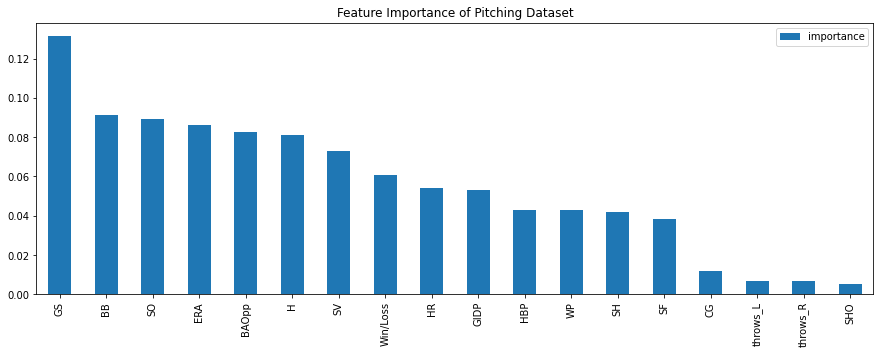

In [126]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of Pitching Dataset')

<h3> Feature Importance: Hitting </h3>

In [127]:
randomForest = RandomForestRegressor()

In [128]:
randomForest.fit(hit_train_X, hit_train_y)

RandomForestRegressor()

In [129]:
feature_importances = pd.DataFrame(randomForest.feature_importances_, 
                                   index = hit_train_X.columns,
                                   columns = ['importance'])

feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
RBI,0.239116
BA,0.110974
OPS,0.110847
SO,0.110600
R,0.091012
GIDP,0.072989
SH,0.067678
SB,0.061586
IBB,0.057750
SF,0.048143


<AxesSubplot:title={'center':'Feature Importance of Hitting Dataset'}>

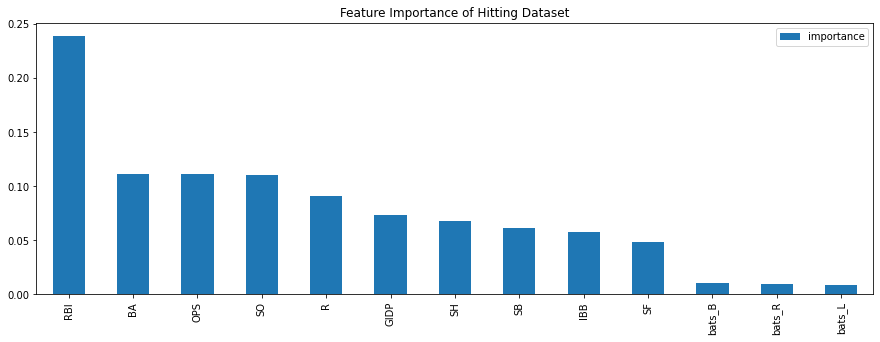

In [130]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of Hitting Dataset')

<h3> Analysis of Feature Importance </h3>
<br></br>
Reviewing the plots for both pitching and hitting reveals that there is no further need to continue to eliminate features from the dataset.

<h1 align = 'center'> Regression Analysis </h1>
<br></br>
For our regression analysis we would like to create an explanatory model that determines how much each feature impacts salary. Because we are building an explanatory model we will not be partitioning the dataset.

<h3> Pitching </h3>

In [131]:
##Create a dataframe for regression and add a constant
pit_y_regress = pit_y
pit_X_regress = pit_X
pit_X_regress["const"] = 1

In [132]:
mod_full = sm.OLS(pit_y_regress,pit_X_regress).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogSalary   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     71.69
Date:                Fri, 26 Nov 2021   Prob (F-statistic):          1.32e-223
Time:                        09:18:10   Log-Likelihood:                -8333.7
No. Observations:                5503   AIC:                         1.670e+04
Df Residuals:                    5485   BIC:                         1.682e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GS             0.0462      0.004     11.699      0.000       0.038       0.054
CG             0.1109      0.028      3.944      0.000       0.056       0.166
SHO           -0.0688      0.051     -1.349      0.177      -0.169       0.031
SV             0.0334      0.002     17.118      0.000       0.030       0.037
H             -0.0008      0.001     -0.695      0.487      -0.003       0.001
HR             0.0056      0.004      1.300      0.194      -0.003       0.014
BB            -0.0143      0.002     -8.798      0.000      -0.018      -0.011
SO             0.0017      0.001      2.524      0.012       0.000       0.003
BAOpp          0.1998      0.370      0.540      0.589      -0.525       0.925
ERA           -0.0177      0.006     -3.056      0.002      -0.029      -0.006
WP            -0.0126      0.007     -1.899      0.058      -0.026       0.000
HBP           -0.0001      0.007     -0.022      0.982      -0.013       0.013
SH             0.0184      0.007      2.662      0.008       0.005       0.032
SF            -0.0060      0.009     -0.638      0.524      -0.024       0.012
GIDP          -0.0024      0.005     -0.487      0.626      -0.012       0.007
Win/Loss       0.0207      0.015      1.370      0.171      -0.009       0.050
throws_L       4.6963      0.036    129.881      0.000       4.625       4.767
throws_R       4.6460      0.034    137.393      0.000       4.580       4.712
const          9.3423      0.061    152.464      0.000       9.222       9.462
==============================================================================
Omnibus:                      637.266   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.567
Skew:                           0.217   Prob(JB):                     3.11e-46
Kurtosis:                       2.148   Cond. No.                     6.84e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

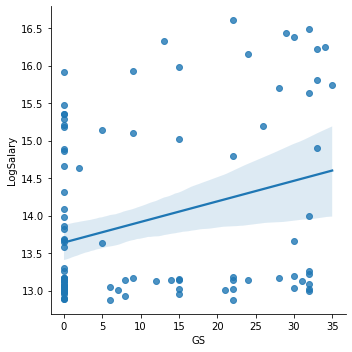

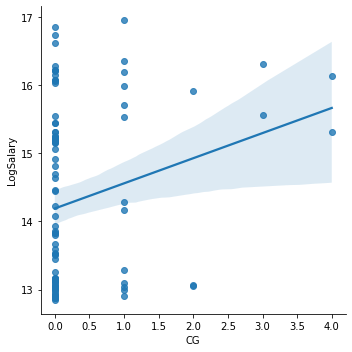

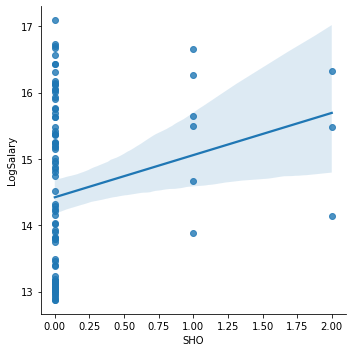

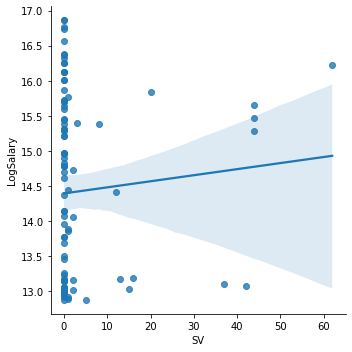

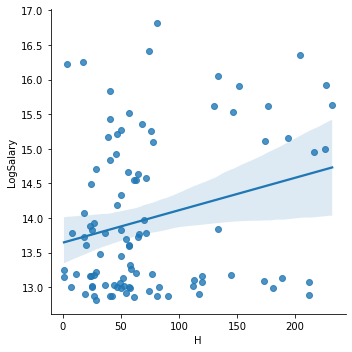

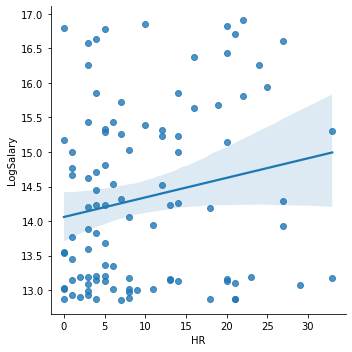

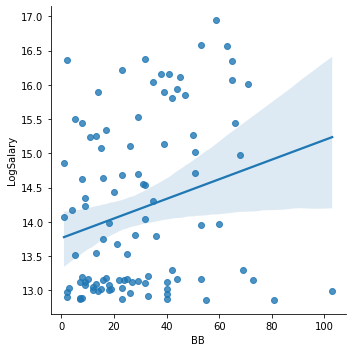

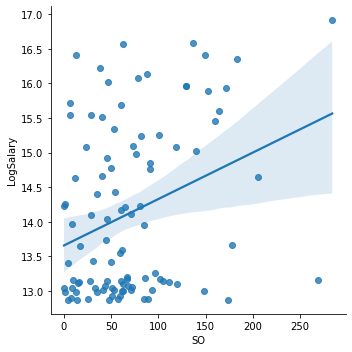

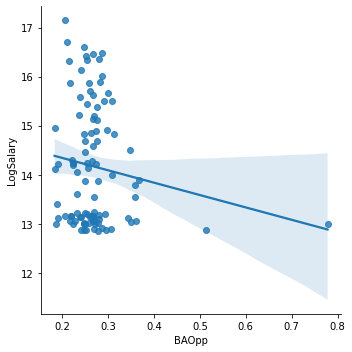

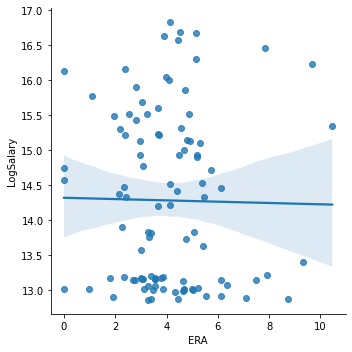

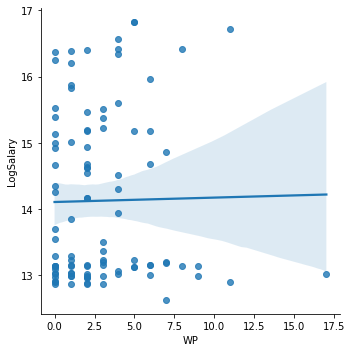

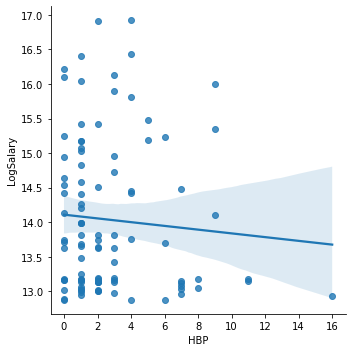

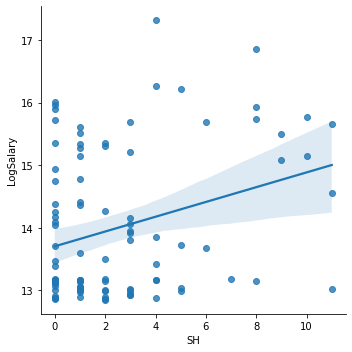

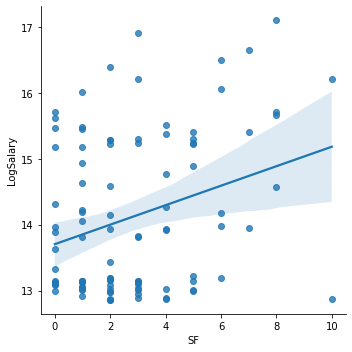

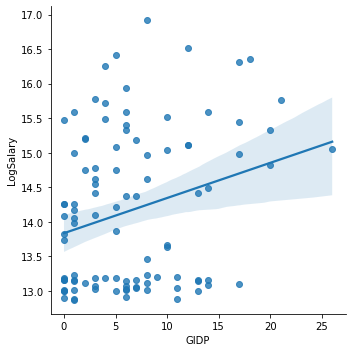

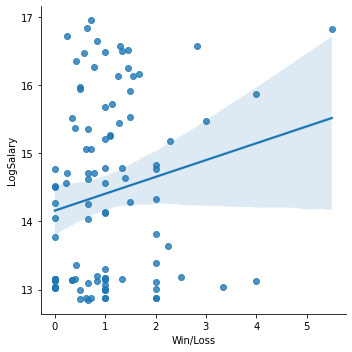

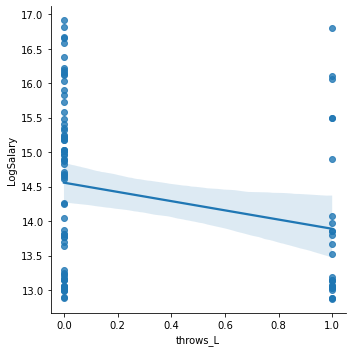

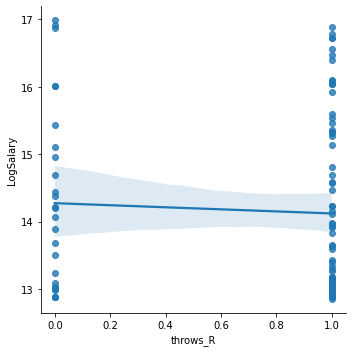

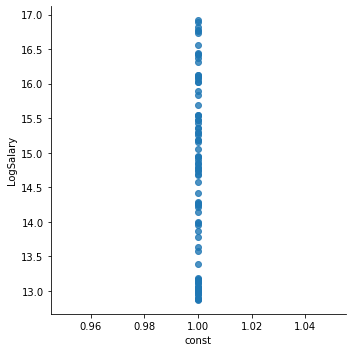

In [133]:
for columns in pit_X.columns:
    sns.lmplot(data=pd.concat([pit_X,pit_y],axis = 1).sample(100), x = columns, y = "LogSalary")
    plt.show()

<h3> Hitting </h3>

In [134]:
##Create a dataframe for regression and add a constant
hit_y_regress = hit_y
hit_X_regress = hit_X
hit_X_regress["const"] = 1

In [135]:
mod_full = sm.OLS(hit_y_regress,hit_X_regress).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogSalary   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     137.0
Date:                Fri, 26 Nov 2021   Prob (F-statistic):          3.67e-300
Time:                        09:18:20   Log-Likelihood:                -8288.2
No. Observations:                5373   AIC:                         1.660e+04
Df Residuals:                    5360   BIC:                         1.669e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R              0.0105      0.002      6.565      0.000       0.007       0.014
RBI            0.0031      0.002      1.855      0.064      -0.000       0.006
SB            -0.0036      0.002     -1.490      0.136      -0.008       0.001
SO            -0.0049      0.001     -7.327      0.000      -0.006      -0.004
IBB            0.0254      0.005      5.547      0.000       0.016       0.034
SH            -0.0617      0.007     -9.162      0.000      -0.075      -0.048
SF             0.0335      0.009      3.570      0.000       0.015       0.052
GIDP           0.0383      0.004      9.226      0.000       0.030       0.046
BA            -2.3899      0.705     -3.391      0.001      -3.771      -1.008
OPS            1.0828      0.285      3.805      0.000       0.525       1.641
bats_B         3.5137      0.038     92.539      0.000       3.439       3.588
bats_L         3.3730      0.033    101.760      0.000       3.308       3.438
bats_R         3.3629      0.030    110.610      0.000       3.303       3.422
const         10.2496      0.068    151.532      0.000      10.117      10.382
==============================================================================
Omnibus:                      213.863   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.362
Skew:                           0.123   Prob(JB):                     5.92e-23
Kurtosis:                       2.370   Cond. No.                     5.84e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

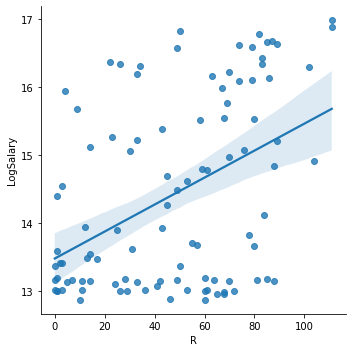

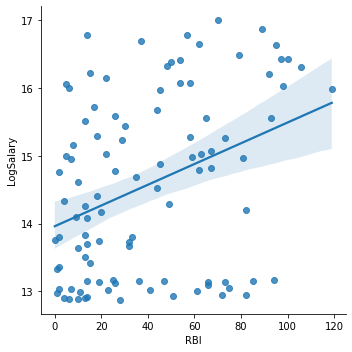

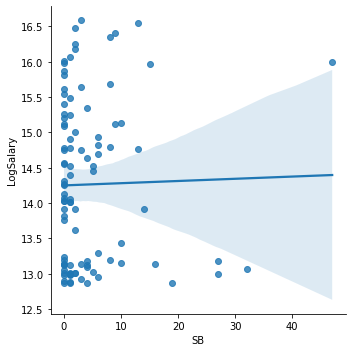

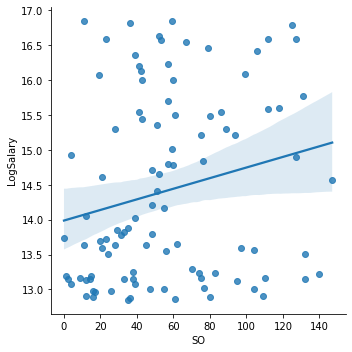

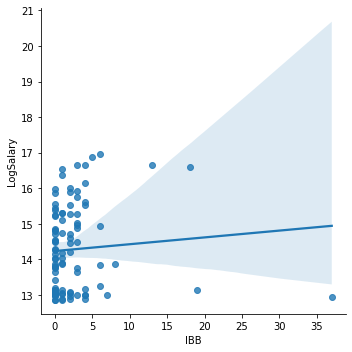

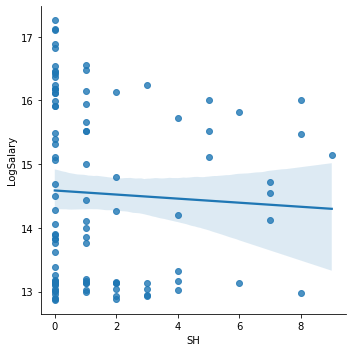

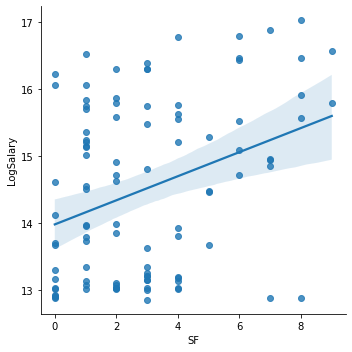

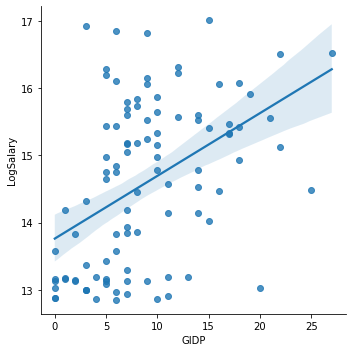

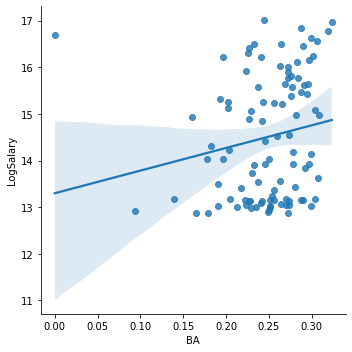

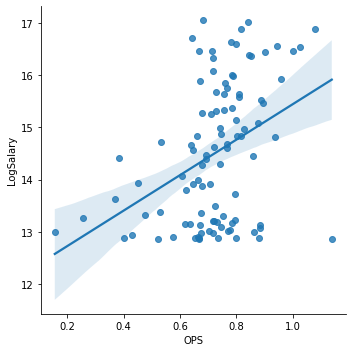

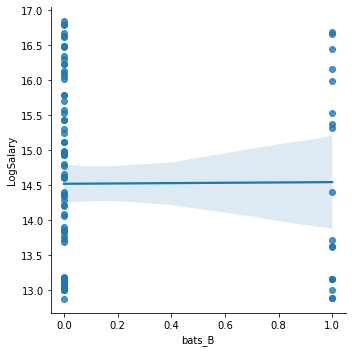

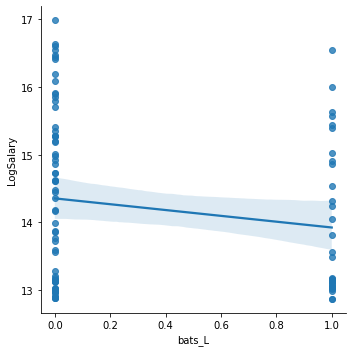

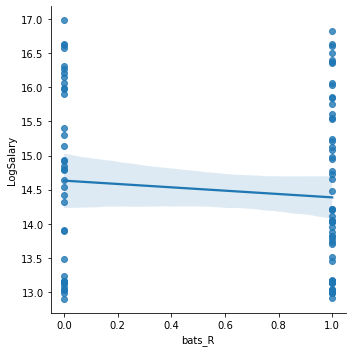

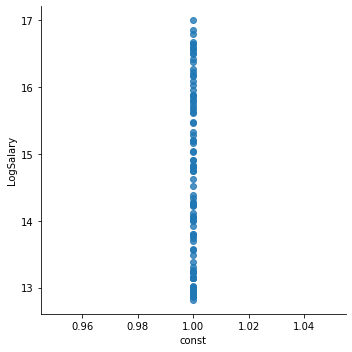

In [136]:
for columns in hit_X.columns:
    sns.lmplot(data=pd.concat([hit_X,hit_y],axis = 1).sample(100), x = columns, y = "LogSalary")
    plt.show()

<h1 align="center">  Data Dictonary for Baseball Statistics DataFrame</h1>

In [137]:
dat_dict = pd.read_csv(r"../Project/StatsDictionary.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../Project/StatsDictionary.csv'

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dat_dict)

In [ ]:
dat_dict.to_dict('index')

<h1 align="center">  Defining Salary Classes</h1>

In [ ]:
q1h = hittingDF.LogSalary.quantile(0.25)
medh = hittingDF.LogSalary.quantile(0.5)
q3h = hittingDF.LogSalary.quantile(0.75)

In [ ]:
q1p = pitchingDF.LogSalary.quantile(0.25)
medp = pitchingDF.LogSalary.quantile(0.5)
q3p = pitchingDF.LogSalary.quantile(0.75)

In [ ]:
hittingDF['Salary Class'] = ''
hittingDF.loc[(hittingDF['LogSalary'] > 0) & (hittingDF['LogSalary'] <= q1h), 'Salary Class'] = 'Low'
hittingDF.loc[(hittingDF['LogSalary'] > q1h) & (hittingDF['LogSalary'] <= medh), 'Salary Class'] = 'Medium'
hittingDF.loc[(hittingDF['LogSalary'] > medh) & (hittingDF['LogSalary'] <= q3h), 'Salary Class'] = 'High'
hittingDF.loc[(hittingDF['LogSalary'] > q3h), 'Salary Class'] = 'All-Star'
hittingDF

In [ ]:
pitchingDF['Salary Class'] = ''
pitchingDF.loc[(pitchingDF['LogSalary'] > 0) & (pitchingDF['LogSalary'] <= q1p), 'Salary Class'] = 'Low'
pitchingDF.loc[(pitchingDF['LogSalary'] > q1p) & (pitchingDF['LogSalary'] <= medp), 'Salary Class'] = 'Medium'
pitchingDF.loc[(pitchingDF['LogSalary'] > medp) & (pitchingDF['LogSalary'] <= q3p), 'Salary Class'] = 'High'
pitchingDF.loc[(pitchingDF['LogSalary'] > q3p), 'Salary Class'] = 'All-Star'
pitchingDF

<h1 align="center">  Data Normalization</h1>

<h3> Normalized Data for Hitting </h3>

In [ ]:
# Create a scaler to do the transformation for hitting
hit_scaler = preprocessing.MinMaxScaler().fit(hit_train_X)

In [ ]:
# Transform hit train X
hit_train_X_scale = hit_scaler.transform(hit_train_X)
hit_train_X_scale = pd.DataFrame(hit_train_X_scale)
hit_train_X_scale.columns = hit_train_X.columns

hit_train_X_scale.describe().transpose()

In [ ]:
# Transform hit test X
hit_test_X_scale = hit_scaler.transform(hit_test_X)
hit_test_X_scale = pd.DataFrame(hit_test_X_scale)
hit_test_X_scale.columns = hit_test_X.columns

hit_test_X_scale.describe().transpose()

<h3> Normalized Data for Pitching </h3>

In [ ]:
# Create a scaler to do the transformation for pitching
pit_scaler = preprocessing.MinMaxScaler().fit(pit_train_X)

In [ ]:
# Transform pit train X
pit_train_X_scale = pit_scaler.transform(pit_train_X)
pit_train_X_scale = pd.DataFrame(pit_train_X_scale)
pit_train_X_scale.columns = pit_train_X.columns

pit_train_X_scale.describe().transpose()

In [ ]:
# Transform pit test X
pit_test_X_scale = pit_scaler.transform(pit_test_X)
pit_test_X_scale = pd.DataFrame(pit_test_X_scale)
pit_test_X_scale.columns = pit_test_X.columns

pit_test_X_scale.describe().transpose()